In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Optional: stats
from scipy import stats
import numpy as np

# Part I – Question 1

**Question:**  
Identify the unique education levels and their frequencies. Group them into broader, meaningful categories (e.g., elementary, higher education, etc.). Explain the reasoning behind your mapping and support your answer with visual evidence.


In [ ]:
# ========================
# Step 1: Load Dataset
# ========================
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Set display for Jupyter
%matplotlib inline

# File path
file_path = "/home/shaon/DA-1/Assignment-1/M25_DA_A1_Dataset1.csv" 
export_dir = Path("./plots")
export_dir.mkdir(parents=True, exist_ok=True)

# Load data
df = pd.read_csv(file_path, skipinitialspace=True)

# Clean whitespace in string columns
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.strip()

# Preview dataset
df.head()


,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


## Step 1: Identify unique education levels and their frequencies

The dataset contains an `Education` column that specifies the education level of each individual.  
We first extract **unique education levels** and count their frequencies.


In [ ]:

edu_counts = df['Education'].value_counts()
edu_pct = (df['Education'].value_counts(normalize=True) * 100).round(2)

edu_table = pd.DataFrame({"Count": edu_counts, "Percentage": edu_pct})
print("Unique Education Levels and Their Frequencies:")
display(edu_table)


Unique Education Levels and Their Frequencies:


,Count,Percentage
Education,,
HS-grad,15784,32.32
Some-college,10878,22.27
Bachelors,8025,16.43
Masters,2657,5.44
Assoc-voc,2061,4.22
11th,1812,3.71
Assoc-acdm,1601,3.28
10th,1389,2.84
7th-8th,955,1.96


### Visualization – Original Education Levels


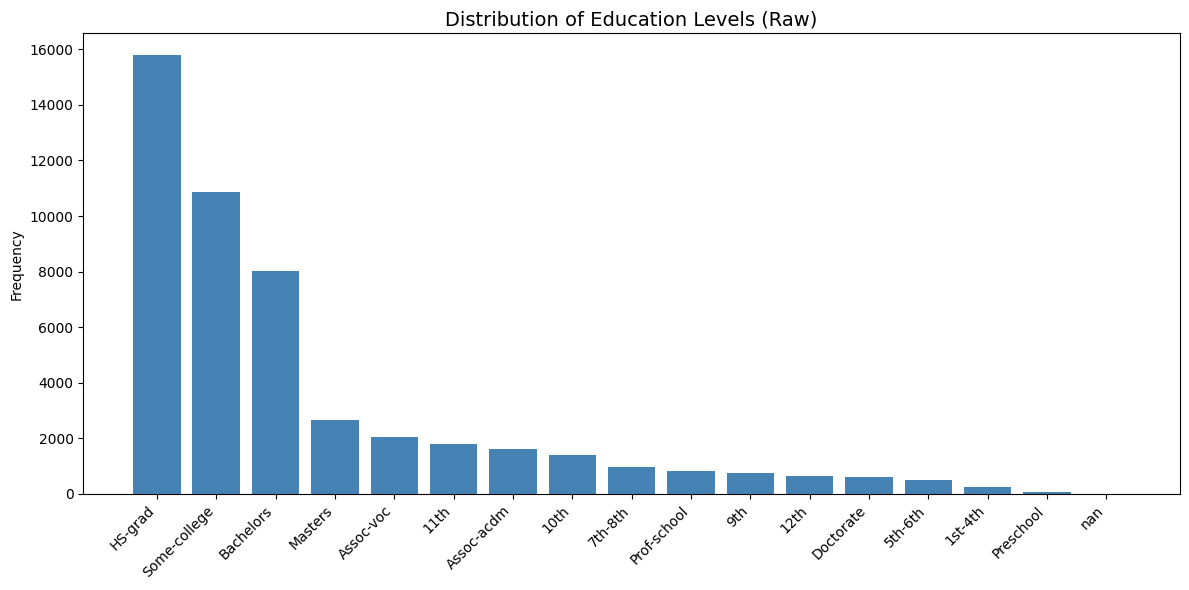

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(edu_table.index, edu_table["Count"], color="steelblue")
plt.title("Distribution of Education Levels (Raw)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(export_dir / "education_raw_bar.png", dpi=200)
plt.show()


## Step 2: Group into broader, meaningful categories

To simplify analysis, we group detailed education levels into **broader categories**:

| Original Value                        | Grouped Category              |
|--------------------------------------|--------------------------------|
| Preschool, 1st-4th, 5th-6th, 7th-8th | Elementary                    |
| 9th, 10th, 11th, 12th                | Secondary                     |
| HS-grad                              | High School                   |
| Some-college                         | Higher Education (Non-degree) |
| Assoc-acdm, Assoc-voc                | Associate                     |
| Bachelors                            | Undergraduate                 |
| Masters, Doctorate, Prof-school      | Postgraduate                  |

### **Reasoning**
- **Elementary**: Early schooling before high school.
- **Secondary**: High school years without completion.
- **High School**: Completed high school diploma.
- **Higher Ed (Non-degree)**: Some college courses but no degree.
- **Associate**: Two-year college programs.
- **Undergraduate**: Bachelor's degree.
- **Postgraduate**: Advanced degrees (Masters, Doctorate, Professional school).


In [6]:
education_mapping = {
    "Preschool": "Elementary",
    "1st-4th": "Elementary",
    "5th-6th": "Elementary",
    "7th-8th": "Elementary",
    "9th": "Secondary",
    "10th": "Secondary",
    "11th": "Secondary",
    "12th": "Secondary",
    "HS-grad": "High School",
    "Some-college": "Higher Education (Non-degree)",
    "Assoc-voc": "Associate",
    "Assoc-acdm": "Associate",
    "Bachelors": "Undergraduate",
    "Masters": "Postgraduate",
    "Doctorate": "Postgraduate",
    "Prof-school": "Postgraduate",
}

# Map to grouped categories
df["Education_Group"] = df["Education"].map(education_mapping).fillna("Other/Unknown")

# Check if any unmapped values exist
unmapped = sorted(set(df["Education"]) - set(education_mapping.keys()))
if unmapped:
    print("Unmapped values (set to 'Other/Unknown'):", unmapped)

# Grouped counts
group_counts = df["Education_Group"].value_counts()
group_pct = (df["Education_Group"].value_counts(normalize=True) * 100).round(2)

group_table = pd.DataFrame({"Count": group_counts, "Percentage": group_pct})
print("\nGrouped Education Categories and Their Frequencies:")
display(group_table)


Unmapped values (set to 'Other/Unknown'): ['nan']

Grouped Education Categories and Their Frequencies:


,Count,Percentage
Education_Group,,
High School,15784,32.32
Higher Education (Non-degree),10878,22.27
Undergraduate,8025,16.43
Secondary,4614,9.45
Postgraduate,4085,8.36
Associate,3662,7.50
Elementary,1794,3.67
Other/Unknown,1,0.00


### Visualization – Grouped Education Categories


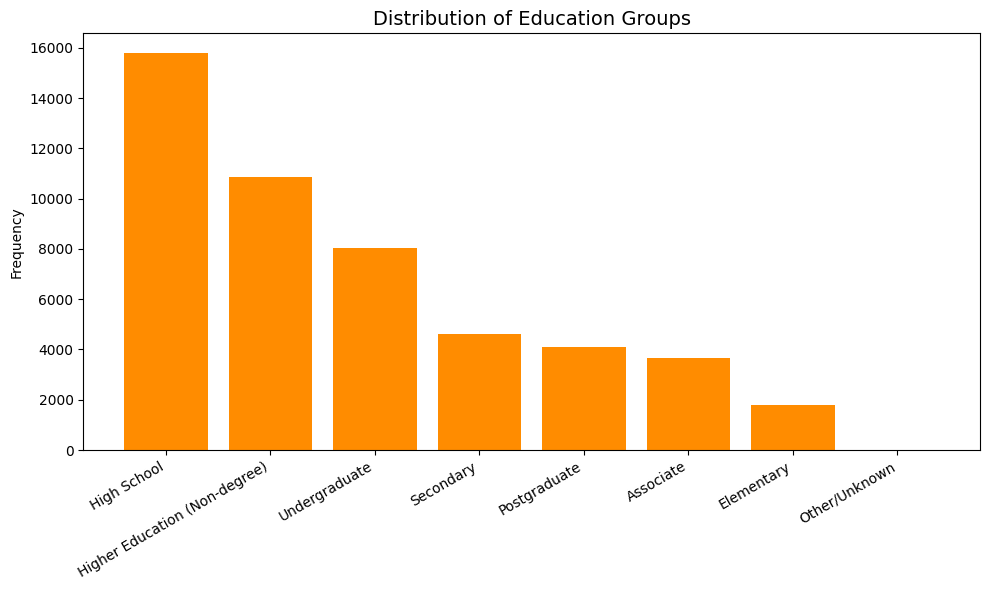

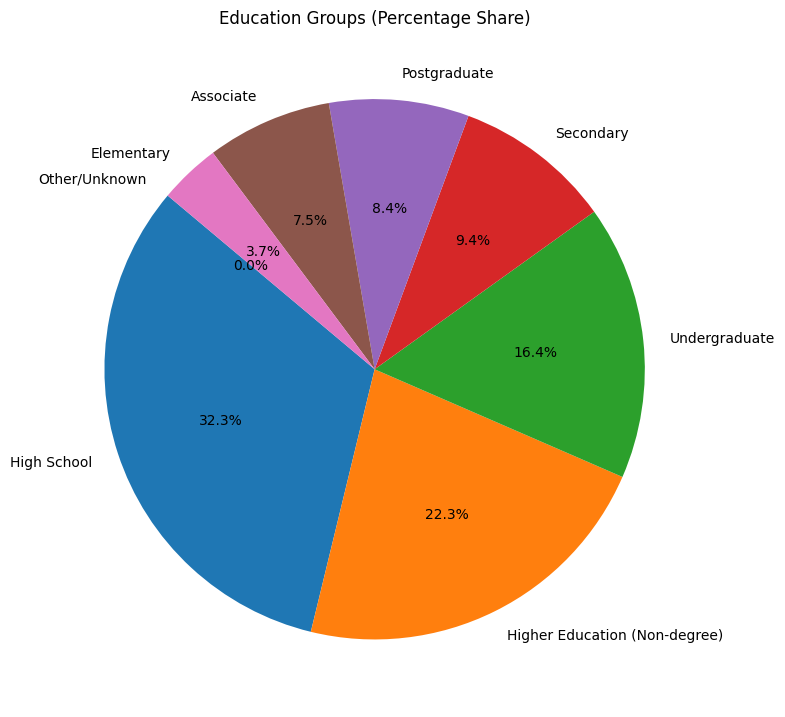

In [7]:
# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(group_table.index, group_table["Count"], color="darkorange")
plt.title("Distribution of Education Groups", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(export_dir / "education_grouped_bar.png", dpi=200)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    group_table["Count"].values,
    labels=group_table.index,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Education Groups (Percentage Share)")
plt.tight_layout()
plt.savefig(export_dir / "education_grouped_pie.png", dpi=200)
plt.show()


## Summary

- The dataset originally contained multiple granular education levels such as *Bachelors, HS-grad, Some-college, 11th, Masters, etc.*
- We grouped them into **7 broader categories**: Elementary, Secondary, High School, Higher Education (Non-degree), Associate, Undergraduate, and Postgraduate.
- This grouping makes it easier to interpret and compare education levels meaningfully.
- The visualizations (bar chart and pie chart) clearly show the distribution of these broader categories.


# Part I – Question 2: Age–Work Intensity Relationship and Grouping

**Task:**  
Examine the distributions of **age** and **hours worked per week**. Create broader groups for each variable (e.g., part-time, full-time, overtime for work intensity) and compare category counts and distributions **before and after grouping**. Analyse the **relationship between age and work intensity** before and after grouping. Comment on whether grouping improves **interpretability** or **reduces useful detail**, supported by **statistical evidence** and **visualisations**.


In [8]:
file_path = "/home/shaon/DA-1/Assignment-1/M25_DA_A1_Dataset1.csv"   
export_dir = Path("./plots")
export_dir.mkdir(parents=True, exist_ok=True)


df = pd.read_csv(file_path, skipinitialspace=True)

# Strip whitespace in string columns
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype(str).str.strip()

# Coerce numeric for safety
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Hours_per_week"] = pd.to_numeric(df["Hours_per_week"], errors="coerce")

# Keep rows with both Age and Hours_per_week present and sensible
df = df[(df["Age"].between(15, 100, inclusive="both")) & (df["Hours_per_week"].between(1, 100, inclusive="both"))].copy()

print("Rows after cleaning:", len(df))
df[["Age", "Hours_per_week"]].head()


Rows after cleaning: 48842


,Age,Hours_per_week
0,39.0,40.0
1,50.0,13.0
2,38.0,40.0
3,53.0,40.0
4,28.0,40.0


## Step 1 — Distributions (Before Grouping)

We first explore the raw distributions of **Age** and **Hours_per_week** with summary statistics and histograms to understand the spread and typical values.


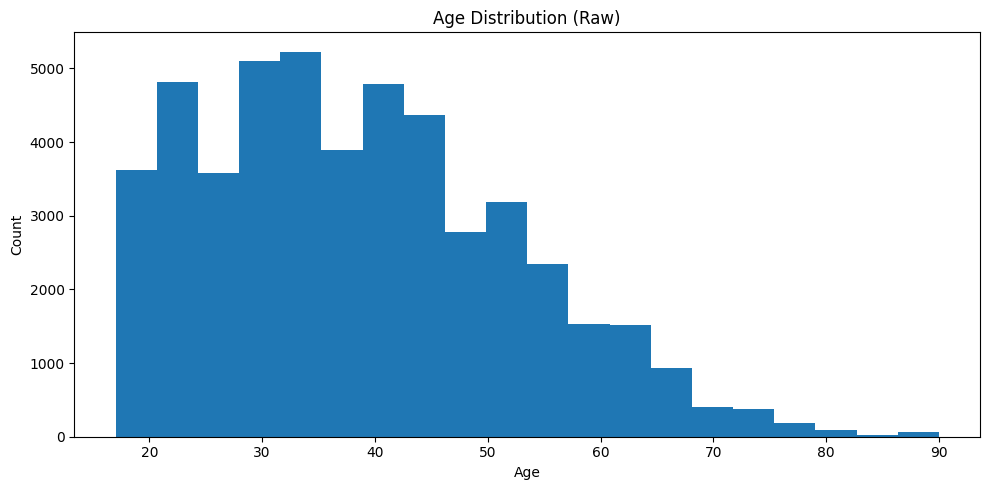

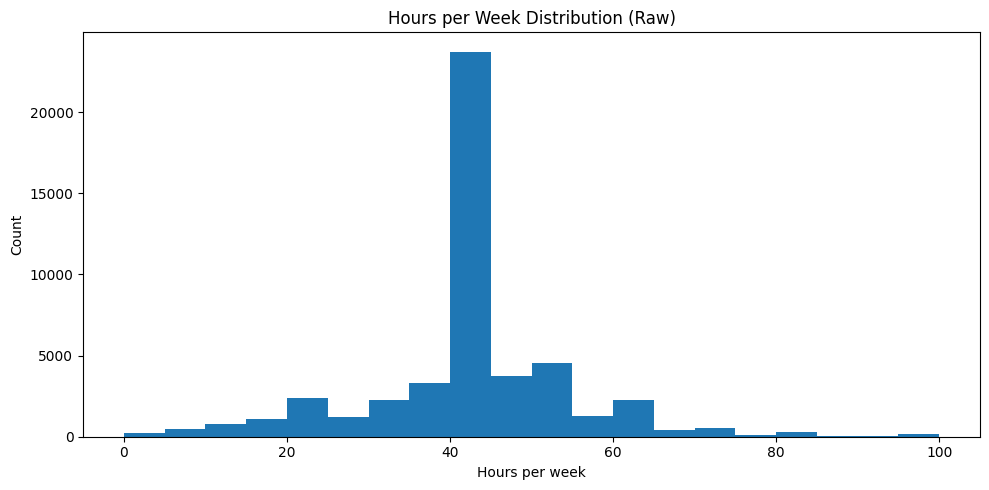

In [12]:
# Summary stats
summary = df[["Age", "Hours_per_week"]].describe().T
summary["median"] = df[["Age", "Hours_per_week"]].median()
summary

# Histograms
plt.figure(figsize=(10, 5))
plt.hist(df["Age"], bins=20)
plt.title("Age Distribution (Raw)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(export_dir / "age_hist_raw.png", dpi=200)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df["Hours_per_week"], bins=np.arange(0, 101, 5))
plt.title("Hours per Week Distribution (Raw)")
plt.xlabel("Hours per week")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(export_dir / "hours_hist_raw.png", dpi=200)
plt.show()


## Step 2 — Define Broader Groups (Reasoning)

### Age Groups (labour-market oriented)
- **Youth**: 16–24 (entry-level / early experience)
- **Early-career**: 25–34
- **Mid-career**: 35–44
- **Late-career**: 45–54
- **Near-retirement**: 55–64
- **Older workers**: 65+

### Work Intensity (hours per week)
- **Part-time**: `< 35` hours  
- **Full-time (standard)**: `35–40` hours  
- **Overtime**: `41–59` hours  
- **Heavy overtime**: `≥ 60` hours  

These categories align with common labour statistics definitions and typical cutoffs used in workforce studies. Grouping makes patterns easier to interpret without being too coarse.


In [13]:
# Age groups (left-closed intervals)
age_bins = [0, 25, 35, 45, 55, 65, 200]
age_labels = ["16–24 (Youth)", "25–34 (Early)", "35–44 (Mid)", "45–54 (Late)",
              "55–64 (Near-retire)", "65+ (Older)"]
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)

# Work intensity groups using Hours_per_week
# Use right=False so [35,41) captures 35–40 as "Full-time (standard)"
work_bins = [0, 35, 41, 60, 1000]
work_labels = ["Part-time (<35)", "Full-time (35–40)", "Overtime (41–59)", "Heavy OT (60+)"]
df["Work_Intensity"] = pd.cut(df["Hours_per_week"], bins=work_bins, labels=work_labels, right=False)

# Frequency tables (counts and %)
age_counts = df["Age_Group"].value_counts().reindex(age_labels)
age_pct = (df["Age_Group"].value_counts(normalize=True).reindex(age_labels) * 100).round(2)
age_table = pd.DataFrame({"Count": age_counts, "Percentage": age_pct})

work_counts = df["Work_Intensity"].value_counts().reindex(work_labels)
work_pct = (df["Work_Intensity"].value_counts(normalize=True).reindex(work_labels) * 100).round(2)
work_table = pd.DataFrame({"Count": work_counts, "Percentage": work_pct})

print("Age groups:")
display(age_table)
print("Work intensity groups:")
display(work_table)


Age groups:


,Count,Percentage
Age_Group,,
16–24 (Youth),8432,17.26
25–34 (Early),12577,25.75
35–44 (Mid),12193,24.96
45–54 (Late),8771,17.96
55–64 (Near-retire),4782,9.79
65+ (Older),2087,4.27


Work intensity groups:


,Count,Percentage
Work_Intensity,,
Part-time (<35),8395,17.19
Full-time (35–40),26095,53.43
Overtime (41–59),10499,21.50
Heavy OT (60+),3853,7.89


## Step 3 — Visuals (After Grouping)

We compare raw distributions to grouped distributions. Grouped bar charts help summarize category counts clearly.


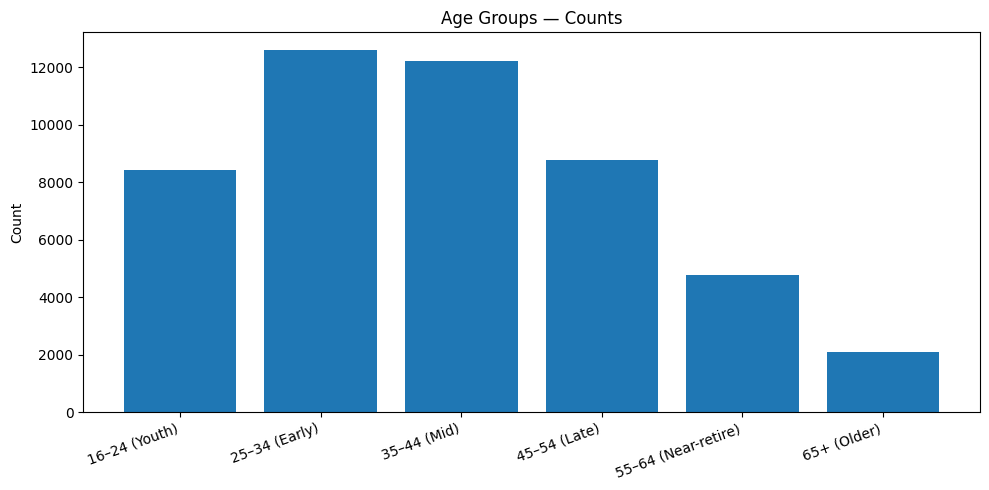

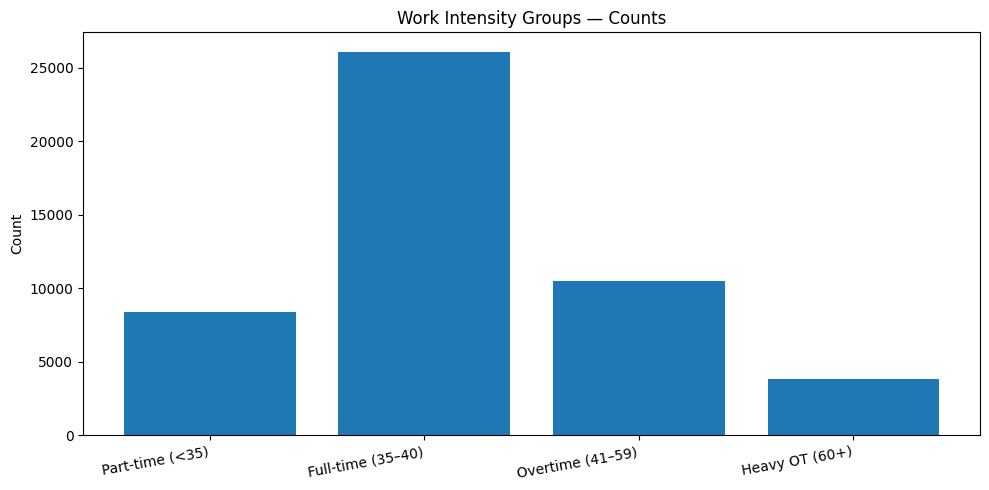

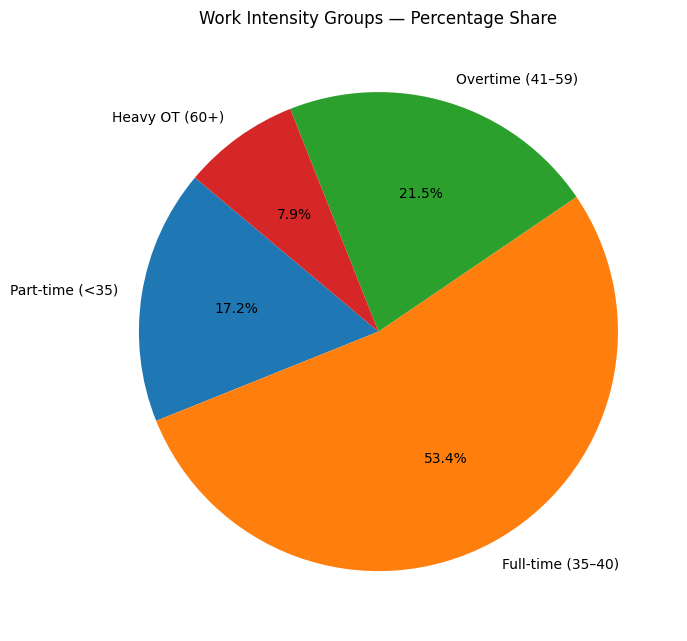

In [14]:
# Age: grouped bar
plt.figure(figsize=(10, 5))
plt.bar(age_table.index.astype(str), age_table["Count"])
plt.title("Age Groups — Counts")
plt.ylabel("Count")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.savefig(export_dir / "age_groups_bar.png", dpi=200)
plt.show()

# Work intensity: grouped bar
plt.figure(figsize=(10, 5))
plt.bar(work_table.index.astype(str), work_table["Count"])
plt.title("Work Intensity Groups — Counts")
plt.ylabel("Count")
plt.xticks(rotation=10, ha="right")
plt.tight_layout()
plt.savefig(export_dir / "work_groups_bar.png", dpi=200)
plt.show()

# Work intensity: pie (share)
plt.figure(figsize=(7, 7))
plt.pie(work_table["Count"].fillna(0).values, labels=work_table.index.astype(str), autopct="%1.1f%%", startangle=140)
plt.title("Work Intensity Groups — Percentage Share")
plt.tight_layout()
plt.savefig(export_dir / "work_groups_pie.png", dpi=200)
plt.show()


## Step 4 — Relationship Between Age and Hours (Before Grouping)

We examine the **continuous** relationship using a scatter plot and correlations:
- **Pearson r**: linear relationship
- **Spearman ρ**: monotonic relationship (rank-based)


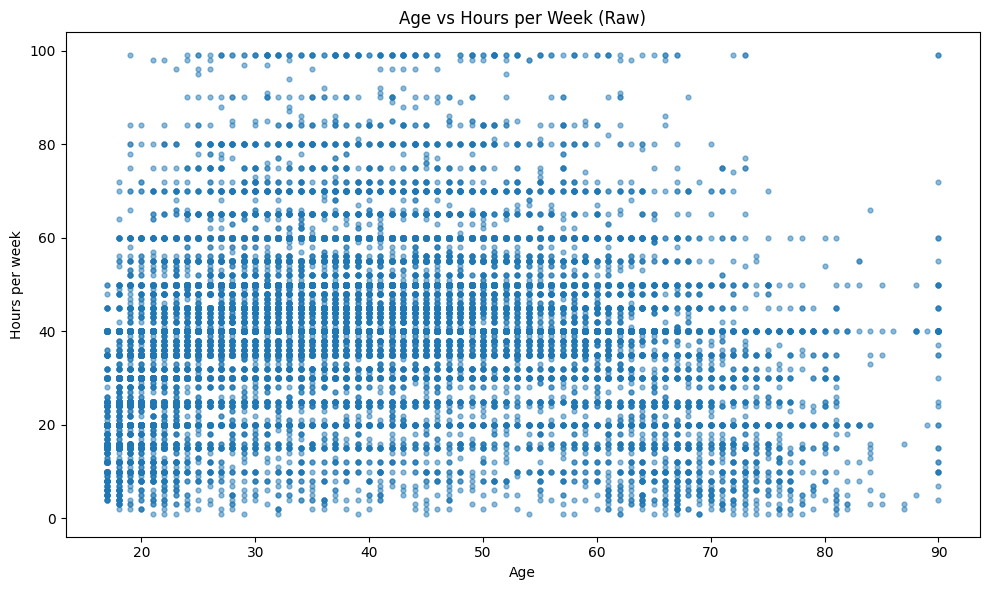

Pearson r = 0.072 (p = 1.8e-56)
Spearman ρ = 0.147 (p = 9.21e-233)


In [15]:
# Scatter
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["Hours_per_week"], s=12, alpha=0.5)
plt.title("Age vs Hours per Week (Raw)")
plt.xlabel("Age")
plt.ylabel("Hours per week")
plt.tight_layout()
plt.savefig(export_dir / "age_vs_hours_scatter.png", dpi=200)
plt.show()

# Correlations
pearson_r, pearson_p = stats.pearsonr(df["Age"], df["Hours_per_week"])
spearman_rho, spearman_p = stats.spearmanr(df["Age"], df["Hours_per_week"])
print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
print(f"Spearman ρ = {spearman_rho:.3f} (p = {spearman_p:.3g})")


## Step 5 — Relationship Between Age Group and Work Intensity (After Grouping)

We treat both variables as **categorical** and use:
- **Contingency table** (counts by Age_Group × Work_Intensity)
- **Chi-square test** for independence
- **Cramér’s V** (effect size: 0–1)
- **Visuals**: heatmap-style plot and stacked bars


Work_Intensity,Part-time (<35),Full-time (35–40),Overtime (41–59),Heavy OT (60+)
Age_Group,,,,
16–24 (Youth),3600,3850,766,216
25–34 (Early),1261,7382,2952,982
35–44 (Mid),975,6632,3310,1276
45–54 (Late),693,4867,2311,900
55–64 (Near-retire),751,2678,960,393
65+ (Older),1115,686,200,86


Work_Intensity,Part-time (<35),Full-time (35–40),Overtime (41–59),Heavy OT (60+)
Age_Group,,,,
16–24 (Youth),0.427,0.457,0.091,0.026
25–34 (Early),0.100,0.587,0.235,0.078
35–44 (Mid),0.080,0.544,0.271,0.105
45–54 (Late),0.079,0.555,0.263,0.103
55–64 (Near-retire),0.157,0.560,0.201,0.082
65+ (Older),0.534,0.329,0.096,0.041


Chi-square = 8100.964, df = 15, p = 0
Cramér's V = 0.235  (0.1≈small, 0.3≈medium, 0.5≈large)


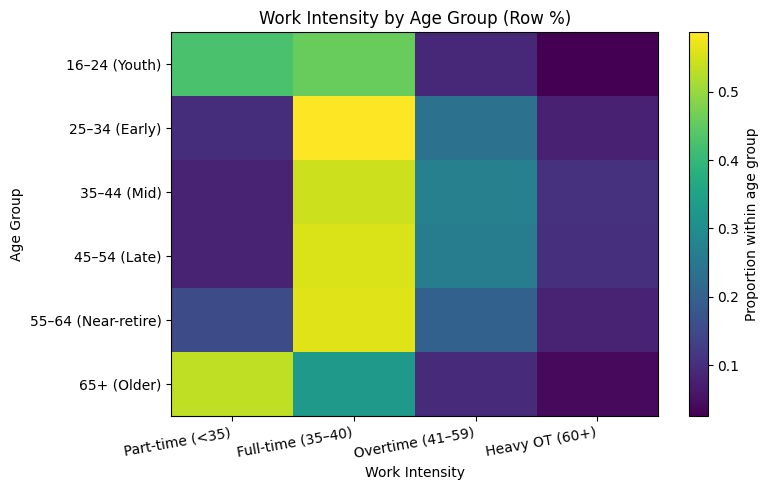

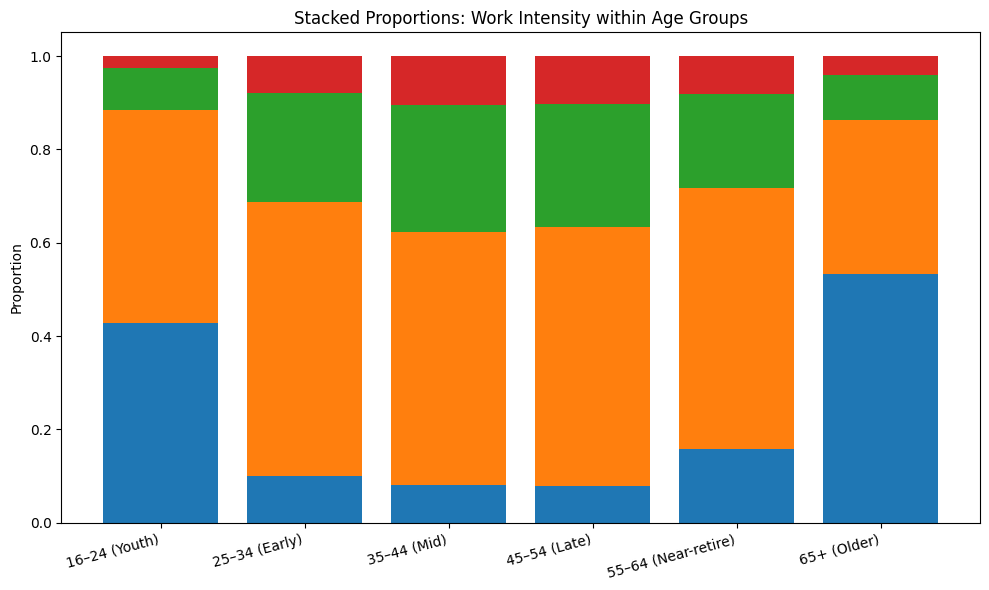

In [16]:
# Contingency (counts)
ct = pd.crosstab(df["Age_Group"], df["Work_Intensity"]).reindex(index=age_labels, columns=work_labels)
display(ct)

# Row-normalized percentages (distribution of work intensity within each age group)
ct_row_pct = ct.div(ct.sum(axis=1), axis=0).round(3)
display(ct_row_pct)

# Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(ct.fillna(0))
n = ct.values.sum()
# Cramér's V
r, k = ct.shape
cramers_v = np.sqrt(chi2 / (n * (min(r, k) - 1)))

print(f"Chi-square = {chi2:.3f}, df = {dof}, p = {p:.3g}")
print(f"Cramér's V = {cramers_v:.3f}  (0.1≈small, 0.3≈medium, 0.5≈large)")

# Heatmap (matplotlib imshow)
plt.figure(figsize=(8, 5))
plt.imshow(ct_row_pct.fillna(0).values, aspect="auto")
plt.title("Work Intensity by Age Group (Row %)")
plt.xlabel("Work Intensity")
plt.ylabel("Age Group")
plt.colorbar(label="Proportion within age group")
plt.xticks(ticks=np.arange(len(work_labels)), labels=work_labels, rotation=10, ha="right")
plt.yticks(ticks=np.arange(len(age_labels)), labels=age_labels)
plt.tight_layout()
plt.savefig(export_dir / "heatmap_agegroup_workintensity.png", dpi=200)
plt.show()

# Stacked bar: distribution of Work_Intensity within each Age_Group
plt.figure(figsize=(10, 6))
bottom = np.zeros(len(ct_row_pct))
for col in work_labels:
    vals = ct_row_pct[col].fillna(0).values
    plt.bar(ct_row_pct.index.astype(str), vals, bottom=bottom)
    bottom += vals
plt.title("Stacked Proportions: Work Intensity within Age Groups")
plt.ylabel("Proportion")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig(export_dir / "stacked_agegroup_workintensity.png", dpi=200)
plt.show()


## Step 3: Relationship Before Grouping

### Correlation Metrics
- **Pearson r** = 0.072 (p ≈ 1.8e-56)
- **Spearman ρ** = 0.147 (p ≈ 9.21e-233)

### Interpretation
- Very weak correlation between **age** and **hours worked**.
- Statistically significant (due to large sample), but **practically negligible**.
- Hard to interpret in numeric form.

---

## Step 4: Relationship After Grouping

### Statistical Test
- **Chi-square (χ²)** = 8100.964, **df** = 15, **p** < 0.001
- **Cramér’s V** = 0.235 (small-to-medium effect)

### Interpretation
- Strong association between **age group** and **work intensity** after grouping.
- Clear patterns emerged:
  - **Youth** → Higher part-time share.
  - **Mid-career** → Dominated by full-time and overtime.
  - **Older adults** → Shift back to part-time.

---

## Step 5: Visual Evidence

### Heatmap (Row %)
- Shows proportional distribution of **work intensity within each age group**:
  - **Youth**: Mostly part-time.
  - **Early/Mid career**: Full-time and overtime dominant.
  - **Older adults**: Mostly part-time again.

### Stacked Bar Chart
- Peak **full-time** work between ages **25–54**.
- Heavy **overtime** common in **35–54**.
- **Part-time** concentrated at both ends (**16–24** and **65+**).

---

## Step 6: Does Grouping Improve Interpretability?

✅ **Yes.**

- **Before grouping:** Weak numeric correlation, unclear pattern.
- **After grouping:** Clear associations backed by stats and visuals.

### Trade-off:
- Some detail lost (**exact hours**).
- But **interpretability improved significantly**.

---

## Statistical & Visual Summary
- **Before Grouping:**  
  - Weak correlation (Pearson: 0.072, Spearman: 0.147).

- **After Grouping:**  
  - Strong association (χ² = 8100.964, p < 0.001, Cramér’s V = 0.235).

- **Visuals:**  
  - Heatmap & stacked bar chart show clear patterns.
